In [18]:
import pandas as pd
import json
import seaborn as sns
import matplotlib.pylab as plt


In [2]:
json_data = pd.read_json('information.json')

In [3]:
f = open('information.json','r')
json_data = json.load(f)

In [4]:
def get_skills(json_data): 
    final_result = []
    for i in range(0, len(json_data)):
        result = {}
        skills = json_data[i]['Skills'] 
        name = json_data[i]['Name']
        result['name'] = name
        result['skills'] = skills
        final_result.append(result)
    return final_result
        

In [5]:
skills_data = get_skills(json_data)


In [6]:
csv_data = pd.read_csv('jobdescript.csv')

In [7]:
csv_data

,Statistics,Machine Learning,Deep Learning,R Language,Python Language,NLP,Data Engineering
0,statistical models,linear regression,neural network,r,python,nlp,aws
1,statistical modeling,logistic regression,keras,ggplot,flask,natural language processing,ec2
2,probability,K means,theano,shiny,django,topic modeling,amazon redshift
3,normal distribution,random forest,face detection,cran,pandas,lda,s3
4,poisson distribution,xgboost,neural networks,dplyr,numpy,named entity recognition,docker
5,hypothesis testing,svm,convolutional neural network (cnn),tidyr,scikitlearn,pos tagging,kubernetes
6,factor analysis,pca,recurrent neural network(RNN),lubridate,sklearn,word2vec,scala
7,forecasting,decision trees,object detection,knitr,matplotlib,word embedding,teradata


In [8]:
stats_words = [(text) for text in csv_data['Statistics'].dropna(axis = 0)]
ml = [(text) for text in csv_data['Machine Learning'].dropna(axis = 0)]
dl = [(text) for text in csv_data['Deep Learning'].dropna(axis = 0)]
rl = [(text) for text in csv_data['R Language'].dropna(axis = 0)]
python_lang = [(text) for text in csv_data['Python Language'].dropna(axis = 0)]
nlp  = [(text) for text in csv_data['NLP'].dropna(axis = 0)]
data_eng = [(text) for text in csv_data['Data Engineering'].dropna(axis = 0)]

In [9]:
for i in range(0, len(skills_data)):
    if(type(skills_data[i]['skills']) == list):
        skills_data[i]['skills'] = list(map(lambda x: x.lower(), skills_data[i]['skills']))    

In [10]:
result = {}
python_count = 0 
ml_count = 0
dl_count = 0
rl_count = 0
nlp_count = 0
data_eng_count = 0 
all_results = []
for data in skills_data:
    person_skill_set = data['skills'] 
    person_name = data['name']
    if person_skill_set is not None:
        for i in range(0, len(person_skill_set)):
            global python_count
            global ml_count
            global dl_count
            global rl_count
            global nlp_count 
            global data_eng_count 
            if person_skill_set[i] in python_lang:
                python_count +=1
                #result['skills'] = {'python_skill': python_count}
                #print("Python Skills: ", python_count)
            if person_skill_set[i] in ml:
                ml_count+=1
                #result = {'ml_skill': ml_count}
            if person_skill_set[i] in dl:
                dl_count+=1
                #result = {'dl_skill': dl_count}
            if person_skill_set[i] in rl:
                rl_count+=1
                #result = {'rl_skill': rl_count}
            if person_skill_set[i] in nlp:
                nlp_count+=1
                #result = {'nlp_skill': nlp_count}
            if person_skill_set[i] in data_eng:
                data_eng_count+=1
                #result = {'data_eng__skill': data_eng_count}
            #result = {'person_name': person_name}   
        result['person_name'] = person_name    
        result['person_matched_skills'] = {
            'python_skill': python_count, 
            'ml_skill': ml_count, 
            'dl_skill': dl_count, 
            'rl_skill': rl_count,
            'nlp_skill': nlp_count,
            'data_eng_skill': data_eng_count
        }
        python_count = 0 
        ml_count = 0
        dl_count = 0
        rl_count = 0
        nlp_count = 0
        data_eng_count = 0  
        result = result.copy()
        all_results.append(result)

ValueError: shape mismatch: objects cannot be broadcast to a single shape

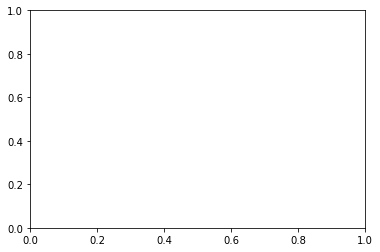

In [37]:
import numpy as np
  
# create data
x = np.arange(25)
y1 = python_data
y2 = ml_data
y3 = dl_data
width = 0.2
  
# plot data in grouped manner of bar type
plt.bar(x-0.2, y1, width, color='cyan')
plt.bar(x, y2, width, color='orange')
plt.bar(x+0.2, y3, width, color='green')
plt.xticks(x, person_name)
plt.xlabel("Person")
plt.ylabel("Scores")
plt.legend(["Python", "Machine Learning Score", "Deep Learning Score"])
plt.show()

In [60]:
python_data = []
ml_data = []
dl_data = []
rl_data = []
nlp_data = []
data_eng_skill = []
person_name = []
for i in range(0, len(all_results)):
    python_data.append(all_results[i]['person_matched_skills']['python_skill'])
    ml_data.append(all_results[i]['person_matched_skills']['ml_skill'])
    dl_data.append(all_results[i]['person_matched_skills']['dl_skill'])
    rl_data.append(all_results[i]['person_matched_skills']['rl_skill'])
    nlp_data.append(all_results[i]['person_matched_skills']['nlp_skill'])
    data_eng_skill.append(all_results[i]['person_matched_skills']['data_eng_skill'])
    person_name.append(all_results[i]['person_name'])

In [61]:
person_name.append('Layla')
python_data.append(3)
ml_data.append(1)
dl_data.append(4)
rl_data.append(1)
nlp_data.append(3)
data_eng_skill.append(5)

In [62]:
dfs = pd.DataFrame(
    {'Person Name': person_name,
     'Python Score': python_data,
     'ML score': ml_data,
     'DL score': dl_data,
     'R score': rl_data,
     'NLP score': nlp_data,
     'Data Engineering Score': data_eng_skill
    })

In [63]:
dfs

,Person Name,Python Score,ML score,DL score,R score,NLP score,Data Engineering Score
0,RnD Computer,1,0,0,0,0,0
1,John Smith,0,0,0,0,0,0
2,Ammad Ahmad,2,0,0,0,0,0
3,RnD Computer,1,0,0,0,0,0
4,John Smith,0,0,0,0,0,0
5,John Smith,0,0,0,0,0,0
6,Layla,3,1,4,1,3,5


<Figure size 432x288 with 0 Axes>

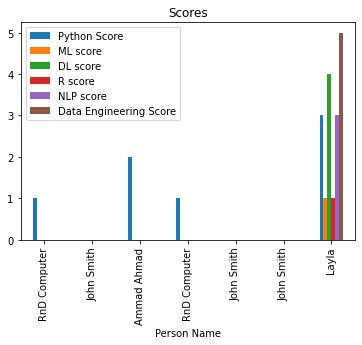

In [71]:
fig = plt.figure()
dfs.plot(x='Person Name',
        kind='bar',
        stacked=False,
        title='Scores')
plt.savefig('line plot.jpg', bbox_inches='tight', dpi=150)

  Team  Round 1  Round 2  Round 3  Round 4
0    A       10       20       10       30
1    B       20       25       15       25
2    C       12       15       19        6
3    D       10       29       13       19


<AxesSubplot:title={'center':'Grouped Bar Graph with dataframe'}, xlabel='Team'>

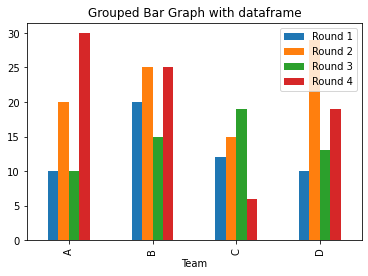

In [38]:
import pandas as pd
  
# create data
df = pd.DataFrame([['A', 10, 20, 10, 30], ['B', 20, 25, 15, 25], ['C', 12, 15, 19, 6],
                   ['D', 10, 29, 13, 19]],
                  columns=['Team', 'Round 1', 'Round 2', 'Round 3', 'Round 4'])
# view data
print(df)
  
# plot grouped bar chart
df.plot(x='Team',
        kind='bar',
        stacked=False,
        title='Grouped Bar Graph with dataframe')

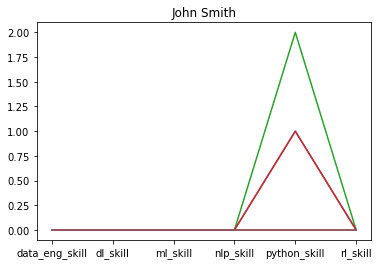

In [25]:
for i in range(0, len(all_results)):
    plt.plot(*zip(*sorted(all_results[i]['person_matched_skills'].items())))
    plt.title(all_results[i]['person_name'])

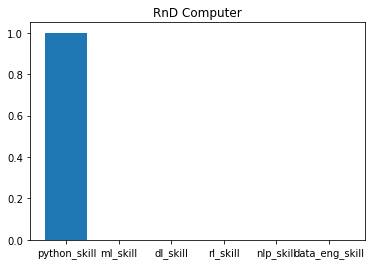

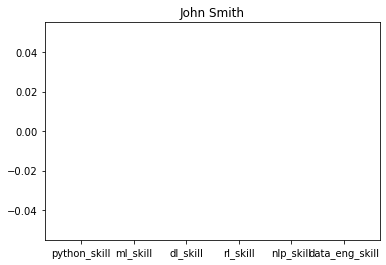

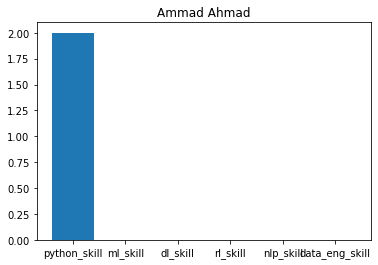

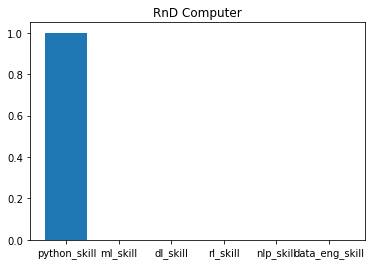

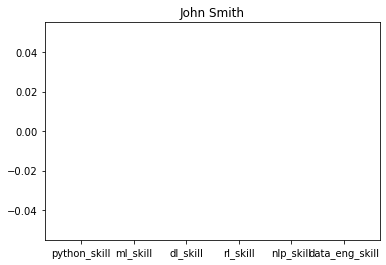

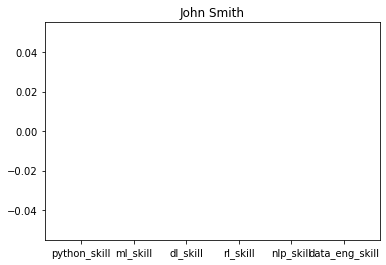

In [27]:
for i in range(0, len(all_results)):
    plt.bar(*zip(*all_results[i]['person_matched_skills'].items()))
    plt.title(all_results[i]['person_name'])
    plt.show()